In [71]:
import pandas as pd 
from pandas import DataFrame
import matplotlib.pyplot as plt

In [72]:
import numpy as np

In [73]:
import seaborn as sns

In [74]:
import neattext.functions as nfx

In [75]:
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import MultinomialNB
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import CountVectorizer

from sklearn.metrics import accuracy_score,classification_report,confusion_matrix


In [77]:
data = pd.read_csv("data/dataset.csv")
df = DataFrame(data)
   

In [78]:
df.head(2)

,Unnamed: 0,Emotion,Text,Clean_Text
0,0,neutral,Why ?,NaN
1,1,joy,Sage Act upgrade on my to do list for tommorow.,Sage Act upgrade list tommorow


In [79]:
#value counts
df['Emotion'].value_counts()

joy         11045
sadness      6722
fear         5410
anger        4297
surprise     4062
neutral      2254
disgust       856
shame         146
Name: Emotion, dtype: int64

<AxesSubplot:xlabel='Emotion', ylabel='count'>

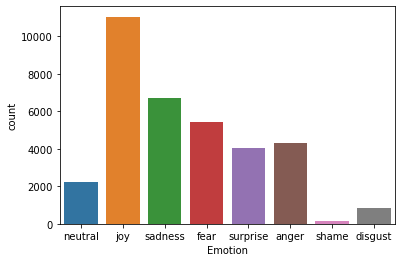

In [80]:
sns.countplot(x='Emotion',data=df)

<AxesSubplot:ylabel='Emotion'>

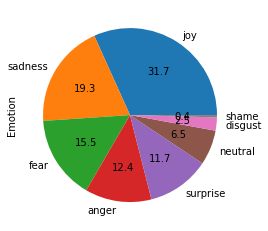

In [81]:
data=df
df['Emotion'].value_counts(normalize=True).plot(kind='pie', autopct="%.1f")

In [82]:
dir(nfx)

['BTC_ADDRESS_REGEX',
 'CURRENCY_REGEX',
 'CURRENCY_SYMB_REGEX',
 'Counter',
 'DATE_REGEX',
 'EMAIL_REGEX',
 'EMOJI_REGEX',
 'HASTAG_REGEX',
 'MASTERCard_REGEX',
 'MD5_SHA_REGEX',
 'MOST_COMMON_PUNCT_REGEX',
 'NUMBERS_REGEX',
 'PHONE_REGEX',
 'PoBOX_REGEX',
 'SPECIAL_CHARACTERS_REGEX',
 'STOPWORDS',
 'STOPWORDS_de',
 'STOPWORDS_en',
 'STOPWORDS_es',
 'STOPWORDS_fr',
 'STOPWORDS_ru',
 'STOPWORDS_yo',
 'STREET_ADDRESS_REGEX',
 'TextFrame',
 'URL_PATTERN',
 'USER_HANDLES_REGEX',
 'VISACard_REGEX',
 '__builtins__',
 '__cached__',
 '__doc__',
 '__file__',
 '__generate_text',
 '__loader__',
 '__name__',
 '__numbers_dict',
 '__package__',
 '__spec__',
 '_lex_richness_herdan',
 '_lex_richness_maas_ttr',
 'clean_text',
 'defaultdict',
 'digit2words',
 'extract_btc_address',
 'extract_currencies',
 'extract_currency_symbols',
 'extract_dates',
 'extract_emails',
 'extract_emojis',
 'extract_hashtags',
 'extract_html_tags',
 'extract_mastercard_addr',
 'extract_md5sha',
 'extract_numbers',
 'extr

In [13]:
df['Clean_Text']=df['Text'].apply(nfx.remove_userhandles)

In [14]:
df['Clean_Text']=df['Clean_Text'].apply(nfx.remove_stopwords)

In [42]:
df

,Unnamed: 0,Emotion,Text,Clean_Text
0,0,neutral,Why ?,NaN
1,1,joy,Sage Act upgrade on my to do list for tommorow.,Sage Act upgrade list tommorow
2,2,sadness,ON THE WAY TO MY HOMEGIRL BABY FUNERAL!!! MAN ...,WAY HOMEGIRL BABY FUNERAL MAN HATE FUNERALS SH...
3,3,joy,Such an eye ! The true hazel eye-and so brill...,eye true hazel eyeand brilliant Regular feat...
4,4,joy,@Iluvmiasantos ugh babe.. hugggzzz for u .! b...,ugh babe hugggzzz u babe naamazed nga ako e...
...,...,...,...,...
34787,34787,surprise,@MichelGW have you gift! Hope you like it! It'...,gift Hope like it hand wear Itll warm Lol
34788,34788,joy,The world didnt give it to me..so the world MO...,world didnt meso world DEFINITELY cnt away
34789,34789,anger,A man robbed me today .,man robbed today
34790,34790,fear,"Youu call it JEALOUSY, I call it of #Losing YO...",Youu JEALOUSY #Losing YOU


In [43]:
Xfeatures= df['Clean_Text'].fillna(' ')
ylabels=df['Emotion']

In [19]:
x_train,x_test,y_train,y_test= train_test_split(Xfeatures,ylabels,test_size=0.3,random_state=42)

In [20]:
from sklearn.pipeline import Pipeline

In [21]:
pipe_lr=Pipeline(steps=[('cv',CountVectorizer()),('lr',LogisticRegression())])

In [23]:
pipe_lr

Pipeline(steps=[('cv', CountVectorizer()), ('lr', LogisticRegression())])

In [24]:
#checking accuracy
pipe_lr.score(x_test,y_test)

0.622341444721211

In [25]:
#test example
ex="I love this song. Its my favourite now."

In [26]:
pipe_lr.predict([ex])

array(['joy'], dtype=object)

In [27]:
#test example 2
ex2="I can't believe he said that!"

In [28]:
pipe_lr.predict([ex2])

array(['anger'], dtype=object)

In [29]:
#test example 3
ex3="I failed the test even after studying so hard."

In [30]:
pipe_lr.predict([ex3])

array(['sadness'], dtype=object)

In [31]:
#Predict Probability of each emotion
pipe_lr.predict_proba([ex3])

array([[0.08141962, 0.00800873, 0.02581704, 0.18709221, 0.00111303,
        0.68780167, 0.00074984, 0.00799787]])

In [32]:
pipe_lr.classes_

array(['anger', 'disgust', 'fear', 'joy', 'neutral', 'sadness', 'shame',
       'surprise'], dtype=object)

In [34]:
import joblib
pipeline_file=open("emotion_classifier_pipe_lr.pkl","wb")
joblib.dump(pipe_lr,pipeline_file)
pipeline_file.close()